Reza Faisal
rezha.faizal567@gmail.com

In [30]:
import shutil, zipfile, os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline


In [ ]:
!wget --no-check-certificate \
  https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

In [ ]:
# extract dataset
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# r = Roshambo =  Rock, Paper, Scissors
labels = ['paper', 'rock', 'scissors']


# init dictionary variable
r_dir = {}
r_file = {}

r_train = {}
r_val = {}

r_train_dir = {}
r_val_dir = {}

base_dir = '/tmp/rockpaperscissors'

for label in labels:
  r_dir[label] = os.path.join(base_dir, label) #dataset directory
  r_file[label] = os.listdir(r_dir[label]) #dataset file
  r_train[label], r_val[label] = train_test_split(r_file[label], test_size=0.4) #split train and val 60/40

In [ ]:
# hasil bagi train dan test
train_total = 0
val_total = 0

for label in labels:
  train_total += len(r_train[label])
  val_total += len(r_val[label])

  print("Train "+label+" : ", len(r_train[label]))
  print("Val "+label+" : ", len(r_val[label]))

print("\nTrain Total : ", train_total)
print("Val Total : ", val_total)

Train paper :  427
Val paper :  285
Train rock :  435
Val rock :  291
Train scissors :  450
Val scissors :  300

Train Total :  1312
Val Total :  876


In [ ]:
# buat folder train dan validation
os.mkdir(os.path.join(base_dir, 'train'))
os.mkdir(os.path.join(base_dir, 'val'))

In [ ]:
# train dan validation direktori
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
# buat direktori label dalam training dan validation
for label in labels:
  r_train_dir[label] = os.path.join(train_dir, label)
  r_val_dir[label] = os.path.join(val_dir, label)

  if not os.path.exists(r_train_dir[label]):
    os.mkdir(r_train_dir[label])
  if not os.path.exists(r_val_dir[label]):
    os.mkdir(r_val_dir[label])

In [ ]:
print(r_train_dir)
print(r_val_dir)

{'paper': '/tmp/rockpaperscissors/train/paper', 'rock': '/tmp/rockpaperscissors/train/rock', 'scissors': '/tmp/rockpaperscissors/train/scissors'}
{'paper': '/tmp/rockpaperscissors/val/paper', 'rock': '/tmp/rockpaperscissors/val/rock', 'scissors': '/tmp/rockpaperscissors/val/scissors'}


In [ ]:
# copy file dataset ke train dan val
for label in labels:
  for filename in r_train[label]:
    if not os.path.exists(os.path.join(r_train_dir[label], filename)):
      shutil.copy(os.path.join(r_dir[label], filename), os.path.join(r_train_dir[label], filename))
  
  for filename in r_val[label]:
    if not os.path.exists(os.path.join(r_val_dir[label], filename)):
      shutil.copy(os.path.join(r_dir[label], filename), os.path.join(r_val_dir[label], filename))

In [ ]:
print('Train Data', sum([len(files) for r, d, files in os.walk(train_dir)]))
print('Validation Data', sum([len(files) for r, d, files in os.walk(val_dir)]))

Train Data 1312
Validation Data 876


In [94]:
# data image generator
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    zoom_range=0.5 ,
    fill_mode = 'nearest')

val_datagen = ImageDataGenerator(rescale = 1./225)

In [95]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=30,
    shuffle=True,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=30,
    shuffle=True,
    class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [96]:
model = Sequential([
  Conv2D(32, 3, activation = 'relu', input_shape= (150,150,3)),
  MaxPooling2D(2,2),
  Conv2D(64, 3 , activation= 'relu'),
  MaxPooling2D(2,2),
  Conv2D(128, 3 , activation= 'relu'),
  MaxPooling2D(2,2),
  Conv2D(256, 3 , activation= 'relu'),
  MaxPooling2D(2,2),
  Flatten(),
  Dense(512, activation= 'relu'),
  Dense(3, activation= 'softmax')
])

In [ ]:
model.summary()

In [99]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(),
              metrics=['accuracy'])

In [100]:
model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = val_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 6s - loss: 2.4686 - accuracy: 0.4120 - val_loss: 0.9481 - val_accuracy: 0.4733 - 6s/epoch - 244ms/step
Epoch 2/20
25/25 - 5s - loss: 0.8560 - accuracy: 0.6160 - val_loss: 0.5049 - val_accuracy: 0.8067 - 5s/epoch - 211ms/step
Epoch 3/20
25/25 - 5s - loss: 0.6421 - accuracy: 0.7628 - val_loss: 0.4013 - val_accuracy: 0.8733 - 5s/epoch - 207ms/step
Epoch 4/20
25/25 - 5s - loss: 0.4800 - accuracy: 0.8302 - val_loss: 0.6079 - val_accuracy: 0.7533 - 5s/epoch - 213ms/step
Epoch 5/20
25/25 - 5s - loss: 0.4261 - accuracy: 0.8467 - val_loss: 0.6224 - val_accuracy: 0.6867 - 5s/epoch - 215ms/step
Epoch 6/20
25/25 - 5s - loss: 0.4206 - accuracy: 0.8440 - val_loss: 0.3190 - val_accuracy: 0.8867 - 5s/epoch - 217ms/step
Epoch 7/20
25/25 - 5s - loss: 0.4030 - accuracy: 0.8706 - val_loss: 0.2803 - val_accuracy: 0.8733 - 5s/epoch - 208ms/step
Epoch 8/20
25/25 - 5s - loss: 0.3674 - accuracy: 0.8573 - val_loss: 0.1970 - val_accuracy: 0.9200 - 5s/epoch - 209ms/step
Epoch 9/20
25/25 - 5s - 

Saving 1e1VCnCEApnFh9Oo.png to 1e1VCnCEApnFh9Oo (9).png
Saving 1Tt9U9SzrOm98Xtw.png to 1Tt9U9SzrOm98Xtw (6).png
Saving 3dI7E5pwR07mvKvF.png to 3dI7E5pwR07mvKvF (8).png
1/1 [==============================] - 0s 17ms/step
1e1VCnCEApnFh9Oo.png
rock
1/1 [==============================] - 0s 13ms/step
1Tt9U9SzrOm98Xtw.png
paper
1/1 [==============================] - 0s 13ms/step
3dI7E5pwR07mvKvF.png
scissors


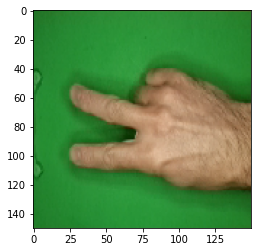

In [102]:
uploaded = files.upload()

for fn in uploaded.keys():
  #prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])


  classes = model.predict(images, batch_size=30)
  print(fn)
  
  print(labels[np.argmax(classes)])